In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import FactorAnalysis

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [9]:
df = pd.read_csv('datasets/diabetes_processed.csv')

features = list(df.drop('Outcome', axis=1))
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
label = 'Outcome'

In [11]:
def build_model(n_components):
    X = df[features]
    Y = df[label]

    fa_obj = FactorAnalysis(n_components=n_components,
                            random_state = 10,
                            max_iter=10000)

    x_new = fa_obj.fit_transform(X, Y)
    X = pd.DataFrame(x_new)

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

    model = LogisticRegression(solver='liblinear',
                               max_iter=1000)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({'y_test' : y_test,
                                 'y_pred' : y_pred})

    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)

    return {'fact_a_obj' : fa_obj,
            'transform_x' : X,
            'accuracy' : acc,
            'recall' : recall,
            'precision' : prec}

In [17]:
def compare_results(result_dict):
    for key in result_dict:
        print('Test: ', key)
        print()
        print('Accuracy Score: ',result_dict[key]['accuracy'])
        print('Precision Score: ',result_dict[key]['precision'])
        print('Recall Score: ',result_dict[key]['recall'])
        print()

In [22]:
def visualize_results(result_dict):
    n_components = list(range(1,9))
    acc = [result_dict[key]['accuracy'] for key in result_dict]
    precision = [result_dict[key]['precision'] for key in result_dict]
    recall = [result_dict[key]['recall'] for key in result_dict]

    plt.figure(figsize=(12,8))
    plt.plot(n_components, acc, label='Accuracy')
    plt.plot(n_components, precision, label='Precision'),
    plt.plot(n_components, recall, label='Recall'),

    plt.xlabel('n_components')
    plt.ylabel('score')
    plt.legend()
    plt.show()
    

In [23]:
result_dict = {}

for i in range(1,9):
    result_dict['n_components - ' + str(i)] = build_model(i)

In [24]:
compare_results(result_dict)

Test:  n_components - 1

Accuracy Score:  0.7077922077922078
Precision Score:  0.8666666666666667
Recall Score:  0.23214285714285715

Test:  n_components - 2

Accuracy Score:  0.7272727272727273
Precision Score:  0.475
Recall Score:  0.475

Test:  n_components - 3

Accuracy Score:  0.7142857142857143
Precision Score:  0.53125
Recall Score:  0.3695652173913043

Test:  n_components - 4

Accuracy Score:  0.7532467532467533
Precision Score:  0.675
Recall Score:  0.5192307692307693

Test:  n_components - 5

Accuracy Score:  0.7467532467532467
Precision Score:  0.7555555555555555
Recall Score:  0.5483870967741935

Test:  n_components - 6

Accuracy Score:  0.7727272727272727
Precision Score:  0.7555555555555555
Recall Score:  0.5862068965517241

Test:  n_components - 7

Accuracy Score:  0.7662337662337663
Precision Score:  0.6829268292682927
Recall Score:  0.5490196078431373

Test:  n_components - 8

Accuracy Score:  0.7402597402597403
Precision Score:  0.7931034482758621
Recall Score:  0.403

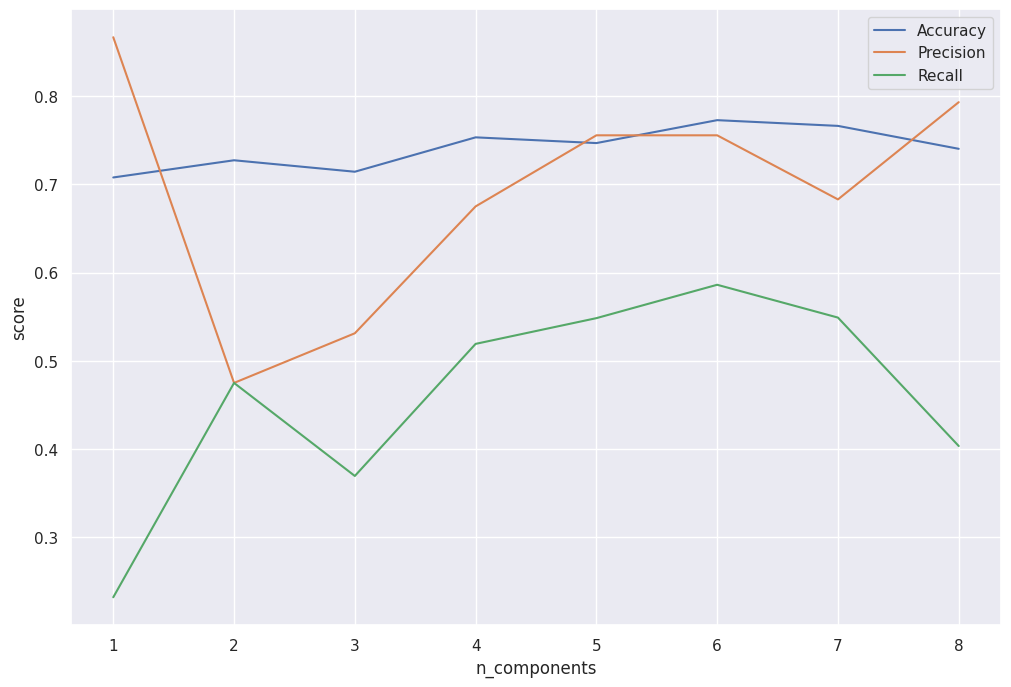

In [25]:
visualize_results(result_dict)